# Tracker Blocker Proposal Initial Sample Size Calculations
July 2019

Details are available in the [design document](https://docs.google.com/document/d/1p_TA7IE5-bKPSSwn8r-c_2KJpUfF387udDqnQhE00fY/edit#), July 19, 2019

In [145]:
options("scipen"=9, "digits"=4)
library(dplyr)
library(MASS)           # contains fitdistr
library(ggplot2)        # for plotting 
library(rlang)
library(tidyverse)
library(viridis)        # colorblind safe palettes
library(DeclareDesign)
library(beepr)
## Installed DeclareDesign 0.13 using the following command:
# install.packages("DeclareDesign", dependencies = TRUE,
#                 repos = c("http://R.declaredesign.org", "https://cloud.r-project.org"))

## DOCUMENTATION AT: https://cran.r-project.org/web/packages/DeclareDesign/DeclareDesign.pdf
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
options(repr.plot.width=7, repr.plot.height=3.5)
sessionInfo()

## the power-analysis-utils.R source file includes the following methods:
# mu.diff.from.mu.irr
# betas.logit.from.prob
# betas.logit.from.mean
# min.diagnosis.power
# iterate.for.power
# plot.power.results
source("../../SOC412/power-analysis-utils.R")

R version 3.5.1 (2018-07-02)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.5 LTS

Matrix products: default
BLAS: /usr/lib/libblas/libblas.so.3.6.0
LAPACK: /usr/lib/lapack/liblapack.so.3.6.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] beepr_1.3            DeclareDesign_0.12.0 estimatr_0.14       
 [4] fabricatr_0.6.0      randomizr_0.16.1     viridis_0.5.1       
 [7] viridisLite_0.3.0    forcats_0.3.0        stringr_1.3.1       
[10] purrr_0.2.5          readr_1.2.1          tidyr_0.8.2         
[13] tibble_1.4.2         tid

# Describe the study
In this study, we examine and compare rates of the following outcome variable:
* Control
* Tracker Blocker A
* Tracker Blocker B
* Tracker Blocker C

The outcome is a binary variable of whether any ads about any products were observed.

# Conduct the Power Analysis

In [133]:
tracker.block.config.three <- data.frame(
    pa.label = "tracker.block.config",
    n.max = 500,
    n.min = 50,
    # 30% of seeing ads for one product
    # with 4 products, there's a 75% chance
    ctl.rate = 0.75,
    tracker.a.rate = 0.5,
    tracker.b.rate = 0.25,
    tracker.c.rate = 0.0
)

tracker.block.config.two <- data.frame(
    pa.label = "tracker.block.config",
    n.max = 100,
    n.min = 2000,
    # 30% of seeing ads for one product
    # with 4 products, there's a 75% chance
    ctl.rate = 0.75,
    tracker.a.rate = 0.25,
    tracker.b.rate = 0.5
)

In [134]:
diagnose.experiment  <- function( n.size, cdf, sims.count = 500, bootstrap.sims.count = 500){
    design <-   declare_population(N = n.size) +
    declare_potential_outcomes(
        ANY_AD_Z_0 = rbinom(n.size, 1, cdf$ctl.rate),
        ANY_AD_Z_1 = rbinom(n.size, 1, cdf$tracker.a.rate),
        ANY_AD_Z_2 = rbinom(n.size, 1, cdf$tracker.b.rate),
        ANY_AD_Z_3 = rbinom(n.size, 1, cdf$tracker.c.rate)
    ) +
    declare_assignment(num_arms = 4, conditions = c("0","1","2","3")) +
    declare_estimand(est_ANY_AD_1_0 = cdf$tracker.a.rate - cdf$ctl.rate) +
    declare_estimand(est_ANY_AD_2_0 = cdf$tracker.b.rate - cdf$ctl.rate) +
    declare_estimand(est_ANY_AD_3_0 = cdf$tracker.c.rate - cdf$ctl.rate) +
    declare_reveal(outcome_variables = c("ANY_AD")) +
    declare_estimator(formula    = ANY_AD ~ Z, 
                      label      = "tracker.a",
                      condition1 = "0", 
                      condition2 = "1",
                      estimand   = "est_ANY_AD_1_0") +
    declare_estimator(formula    = ANY_AD ~ Z, 
                      label      = "tracker.b",
                      condition1 = "0", 
                      condition2 = "2",
                      estimand   = "est_ANY_AD_2_0") +                      
    declare_estimator(formula    = ANY_AD ~ Z, 
                      label      = "tracker.c",
                      condition1 = "0", 
                      condition2 = "3",
                      estimand   = "est_ANY_AD_3_0")


    diagnosis <- diagnose_design(design, sims = sims.count, 
                                 bootstrap_sims = bootstrap.sims.count)
    diagnosis
}    

In [135]:
interval = 25
power.iterate.df <- iterate.for.power(tracker.block.config.three, 
                                      diagnosis.method=diagnose.experiment, 
                                      iteration.interval = interval)

[1] "min: 50 max: 500 current: 50"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 75"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 100"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 125"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 150"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 175"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 200"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 225"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 250"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 275"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 300"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 325"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 350"
[1] "     seconds: 13"
[1] "min: 50 max: 500 current: 375"
[1] "     seconds: 14"
[1] "min: 50 max: 500 current: 400"
[1] "     seconds: 14"
[1] "min: 50 max: 500 current: 425"
[1] "     seconds: 14"
[1] "min: 50 max: 500 current: 450"
[1] "     seconds: 14"

# Plot Results

Warning message:
“Removed 3 rows containing missing values (geom_path).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

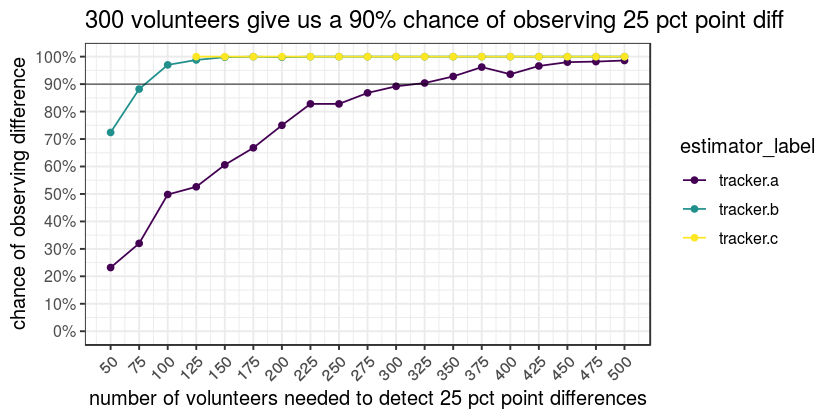

In [144]:
ggplot(power.iterate.df, aes(n, power, color=estimator_label)) +
    ## CHART SUBSTANCE
    geom_line() +
    geom_point() +
    ## LABELS AND COSMETICS
    geom_hline(yintercept=0.9, size=0.25) +
    theme_bw(base_size = 12, base_family = "Helvetica") +
    theme(axis.text.x = element_text(angle=45, hjust = 1)) +
    scale_y_continuous(breaks = seq(0,1,0.1), limits = c(0,1), labels=scales::percent) +
    scale_x_continuous(breaks = seq(tracker.block.config.three$n.min,
                                    tracker.block.config.three$n.max,interval)) +
    scale_color_viridis(discrete=TRUE) +
    xlab("number of volunteers needed to detect 25 pct point differences") +
    ylab("chance of observing difference") +
    ggtitle("300 volunteers give us a 90% chance of observing 25 pct point diff")